In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import urllib
import pandas as pd

# Chargement et mise en forme recueil

In [3]:
df_recueil = pd.read_csv('data/corpus/220930-RecueilComplet.csv')

In [4]:
df_recueil[df_recueil['parse_method']!='parse'].shape

(25, 31)

In [5]:
# Suppression des articles qui n'ont pas été parsé de manière précise
df_corpus = df_recueil[df_recueil['parse_method']=='parse']

In [6]:
# Suppression articles vides éventuels
df_corpus = df_corpus[df_corpus['article'].notna()]

In [7]:
# Concaténation Titre et Article
#df_corpus.loc[:,'text'] = df_corpus['title']+'\n'+df_corpus['article']

In [8]:
df_corpus

,url,title,article,parse_method,date,tag,abstract,author,date_iso,words,...,des pages et des pages,des chiffres et des tableaux,sophisme,inversion de la preuve,invérifiable,propos rapporté,sources citées,titre décalé,site,text
2,https://www.breizh-info.com/2022/02/23/180457/...,Tests – vaccins – pass : fabrique de la paniqu...,Cela fait 2 ans que la crise du coronavirus a ...,parse,Le \n\t\t\t\t\t\t\t\t\t\t23 février 2022,"['Santé', 'covid', 'crise', ""décoder l'éco"", '...",NaN,NaN,2022-02-23T00:00:00,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,www.breizh-info.com,Tests – vaccins – pass : fabrique de la paniqu...
3,https://www.breizh-info.com/2022/02/20/180182/...,"Covid-19. La pandémie et les vaccins, pour mie...","Ces dernières semaines, le monde entier a prêt...",parse,Le \n\t\t\t\t\t\t\t\t\t\t20 février 2022,"['A La Une', 'Santé', ""coup d'etat mondial"", '...",NaN,NaN,2022-02-20T00:00:00,NaN,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,www.breizh-info.com,"Covid-19. La pandémie et les vaccins, pour mie..."
4,https://www.breizh-info.com/2022/04/19/185260/...,Covid-19. Une épidémie quasiment terminée avan...,Voici mon avant dernier bulletin de situation ...,parse,Le \n\t\t\t\t\t\t\t\t\t\t19 avril 2022,"['A La Une', 'Santé', 'COVID-19', 'epidemie', ...",NaN,NaN,2022-04-19T00:00:00,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,www.breizh-info.com,Covid-19. Une épidémie quasiment terminée avan...
5,https://www.breizh-info.com/2022/04/15/184984/...,"Piscine, voile, ramadan : scènes de la vie ord...",On a beaucoup parlé du Grand remplacement dura...,parse,Le \n\t\t\t\t\t\t\t\t\t\t15 avril 2022,"['Education', 'Société', 'burkini', 'hallal', ...",NaN,NaN,2022-04-15T00:00:00,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,www.breizh-info.com,"Piscine, voile, ramadan : scènes de la vie ord..."
6,https://www.breizh-info.com/2021/11/02/173738/...,Faut-il vous métisser comme le suggère la pres...,Comme nous le verrons dans l’ensemble des étud...,parse,Le \n\t\t\t\t\t\t\t\t\t\t2 novembre 2021,"['Sciences', 'métis', 'metissage', 'race']",NaN,NaN,2021-11-02T00:00:00,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,www.breizh-info.com,Faut-il vous métisser comme le suggère la pres...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,https://www.wikistrike.com/2022/08/fresne-cett...,Fresnes: cette prison où les condamnés finisse...,Cette photo est une erreur \n\nEt nul n'est au...,parse,Publié par wikistrike.com\n ...,[],NaN,NaN,2022-08-21T00:00:00,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,www.wikistrike.com,Fresnes: cette prison où les condamnés finisse...
464,https://www.wikistrike.com/2022/08/le-forum-ec...,Le Forum économique mondial estime qu’il exist...,Ne trahissant pas sa réputation de méchant d’u...,parse,Publié par wikistrike.com\n ...,[],NaN,NaN,2022-08-23T00:00:00,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,www.wikistrike.com,Le Forum économique mondial estime qu’il exist...
465,https://www.wikistrike.com/2022/08/le-masque-r...,"Le masque réduit les infections COVID de 0,06%",par Collectif Reinfocovid.\nCet article illust...,parse,Publié par wikistrike.com\n ...,[],NaN,NaN,2022-08-24T00:00:00,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,www.wikistrike.com,"Le masque réduit les infections COVID de 0,06%..."
466,https://www.wikistrike.com/2022/08/l-un-des-pl...,L’un des plus grands complexes mégalithiques d...,"En Espagne, le site d’une future plantation d’...",parse,Publié par wikistrike.com\n ...,[],NaN,NaN,2022-08-24T00:00:00,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,www.wikistrike.com,L’un des plus grands complexes mégalithiques d...


# Corpus par attribut

In [9]:
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

In [10]:
def merge_texts(texts):
    result = ''
    for text in texts:
        result = result + text + '\n'
    return result

In [11]:
df_corpus.keys()

Index(['url', 'title', 'article', 'parse_method', 'date', 'tag', 'abstract',
       'author', 'date_iso', 'words', 'infox', 'signé',
       'lieux, dates et personnes ', 'lieux, dates et personnes cohérentes',
       'points de vue différents présentés', 'écriture de qualité', 'faits',
       'opinions', 'fausse nouvelle', 'insinuations', 'scientifique sulfureux',
       'des pages et des pages', 'des chiffres et des tableaux', 'sophisme',
       'inversion de la preuve', 'invérifiable', 'propos rapporté',
       'sources citées', 'titre décalé', 'site', 'text'],
      dtype='object')

In [16]:
labels = [
    'infox', 'signé', 'lieux, dates et personnes ',
    'lieux, dates et personnes cohérentes',
    'points de vue différents présentés', 'écriture de qualité',
    'faits', 'opinions', 'fausse nouvelle', 'insinuations',
     'scientifique sulfureux',
    'des pages et des pages', 'des chiffres et des tableaux', 'sophisme',
    'inversion de la preuve', 'invérifiable', 'propos rapporté',
    'sources citées', 'titre décalé',
]

In [17]:
for label in labels:
    df_corpus[label] = df_corpus[label].astype(bool)

In [18]:
def count_words_label(df,label):
    df_texts = pd.pivot_table(df, values='text', index=None, columns=label, aggfunc=merge_texts)
    print(label)
    wc = {}
    word_analysis = {}
    for key in df_texts.keys():
        text = df_texts[key]['text']
        count_colname = label+'_'+str(key)
        wc[key] = lex.count_tokens(lex.get_words(text))
        for word in wc[key]:
            word_dic = word_analysis.get(word,{})
            word_dic[count_colname]=wc[key][word]
            word_analysis[word]=word_dic
    return word_analysis

In [19]:
counters = {}
for label in labels:
    counts = count_words_label(df_corpus,label)
    for word in counts:
        for key in counts[word].keys():
            word_dic = counters.get(word,{})
            word_dic[key] = counts[word][key]
            counters[word] = word_dic

infox
signé
lieux, dates et personnes 
lieux, dates et personnes cohérentes
points de vue différents présentés
écriture de qualité
faits
opinions
fausse nouvelle
insinuations
scientifique sulfureux
des pages et des pages
des chiffres et des tableaux
sophisme
inversion de la preuve
invérifiable
propos rapporté
sources citées
titre décalé


In [20]:
counters

{'rennes': {'infox_False': 24,
  'infox_True': 6,
  'signé_False': 19,
  'signé_True': 11,
  'lieux, dates et personnes _False': 1,
  'lieux, dates et personnes _True': 29,
  'lieux, dates et personnes cohérentes_False': 1,
  'lieux, dates et personnes cohérentes_True': 29,
  'points de vue différents présentés_False': 30,
  'écriture de qualité_True': 30,
  'faits_False': 15,
  'faits_True': 15,
  'opinions_False': 25,
  'opinions_True': 5,
  'fausse nouvelle_False': 25,
  'fausse nouvelle_True': 5,
  'insinuations_False': 24,
  'insinuations_True': 6,
  'scientifique sulfureux_False': 30,
  'des pages et des pages_False': 30,
  'des chiffres et des tableaux_False': 30,
  'sophisme_False': 30,
  'inversion de la preuve_False': 30,
  'invérifiable_False': 25,
  'invérifiable_True': 5,
  'propos rapporté_False': 24,
  'propos rapporté_True': 6,
  'sources citées_False': 24,
  'sources citées_True': 6,
  'titre décalé_False': 30},
 'reprise': {'infox_False': 10,
  'infox_True': 8,
  'sig

In [21]:
df_counters = pd.DataFrame(counters).transpose()

In [22]:
df_counters=df_counters.fillna(0)

In [23]:
df_counters

,infox_False,infox_True,signé_False,signé_True,"lieux, dates et personnes _False","lieux, dates et personnes _True","lieux, dates et personnes cohérentes_False","lieux, dates et personnes cohérentes_True",points de vue différents présentés_False,écriture de qualité_True,...,sources citées_True,titre décalé_False,points de vue différents présentés_True,scientifique sulfureux_True,des pages et des pages_True,des chiffres et des tableaux_True,sophisme_True,inversion de la preuve_True,écriture de qualité_False,titre décalé_True
rennes,24.0,6.0,19.0,11.0,1.0,29.0,1.0,29.0,30.0,30.0,...,6.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reprise,10.0,8.0,13.0,5.0,7.0,11.0,7.0,11.0,15.0,18.0,...,5.0,18.0,3.0,1.0,5.0,3.0,1.0,2.0,0.0,0.0
des,3173.0,6186.0,5387.0,3972.0,4703.0,4656.0,4738.0,4621.0,8881.0,9276.0,...,3680.0,8212.0,478.0,629.0,2721.0,1292.0,590.0,1162.0,83.0,1147.0
vols,17.0,13.0,25.0,5.0,10.0,20.0,11.0,19.0,30.0,29.0,...,0.0,27.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,3.0
commerciaux,12.0,7.0,11.0,8.0,6.0,13.0,6.0,13.0,18.0,19.0,...,5.0,15.0,1.0,1.0,4.0,3.0,0.0,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rogov,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
dniepropietrovsk,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
energodar,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
barges,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
df_counters.to_csv('data/analysis/220805-ComptageRecueil.csv',decimal=',')

In [25]:
from collections import Counter

In [26]:

stop_words = []
top_false = list(df_counters.nlargest(300,'infox_False').index)
top_true = list(df_counters.nlargest(300,'infox_True').index)
for word in top_false:
    if word in top_true:
        stop_words.append(word)

In [27]:
len(stop_words)

224

In [28]:
df_counters.drop(index = stop_words).nlargest(30,'infox_True')

,infox_False,infox_True,signé_False,signé_True,"lieux, dates et personnes _False","lieux, dates et personnes _True","lieux, dates et personnes cohérentes_False","lieux, dates et personnes cohérentes_True",points de vue différents présentés_False,écriture de qualité_True,...,sources citées_True,titre décalé_False,points de vue différents présentés_True,scientifique sulfureux_True,des pages et des pages_True,des chiffres et des tableaux_True,sophisme_True,inversion de la preuve_True,écriture de qualité_False,titre décalé_True
décès,19.0,557.0,391.0,185.0,296.0,280.0,296.0,280.0,558.0,574.0,...,362.0,564.0,18.0,13.0,448.0,413.0,130.0,21.0,2.0,12.0
vaccins,49.0,375.0,251.0,173.0,224.0,200.0,227.0,197.0,412.0,412.0,...,253.0,382.0,12.0,85.0,173.0,72.0,64.0,48.0,12.0,42.0
dr,28.0,313.0,70.0,271.0,61.0,280.0,61.0,280.0,337.0,338.0,...,273.0,314.0,4.0,39.0,53.0,12.0,6.0,34.0,3.0,27.0
virus,45.0,287.0,157.0,175.0,133.0,199.0,131.0,201.0,313.0,332.0,...,197.0,289.0,19.0,80.0,170.0,52.0,34.0,12.0,0.0,43.0
enfants,47.0,241.0,188.0,100.0,164.0,124.0,165.0,123.0,286.0,280.0,...,155.0,246.0,2.0,62.0,122.0,61.0,30.0,32.0,8.0,42.0
al,3.0,205.0,190.0,18.0,195.0,13.0,195.0,13.0,208.0,208.0,...,16.0,206.0,0.0,2.0,200.0,189.0,3.0,2.0,0.0,2.0
médecin,9.0,198.0,46.0,161.0,31.0,176.0,31.0,176.0,205.0,203.0,...,169.0,192.0,2.0,9.0,13.0,5.0,0.0,24.0,4.0,15.0
effets,45.0,194.0,158.0,81.0,152.0,87.0,153.0,86.0,224.0,237.0,...,156.0,222.0,15.0,56.0,92.0,25.0,22.0,20.0,2.0,17.0
pfizer,21.0,193.0,158.0,56.0,121.0,93.0,122.0,92.0,195.0,202.0,...,118.0,180.0,19.0,46.0,70.0,52.0,15.0,14.0,12.0,34.0
campagne,35.0,188.0,118.0,105.0,176.0,47.0,174.0,49.0,218.0,223.0,...,99.0,216.0,5.0,5.0,154.0,81.0,8.0,78.0,0.0,7.0


In [29]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [30]:
df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=['infox'], aggfunc=merge_texts)

In [31]:
df_texts

infox,False,True
text,Rennes. Reprise des vols commerciaux le 15 jui...,Tests – vaccins – pass : fabrique de la paniqu...


In [32]:
def display_wc(text,sw):
    wordcloud = WordCloud(background_color = 'white', stopwords = sw, max_words = 50).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

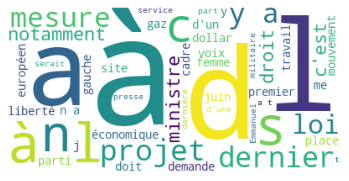

In [33]:
display_wc(df_texts[False][0],stop_words)

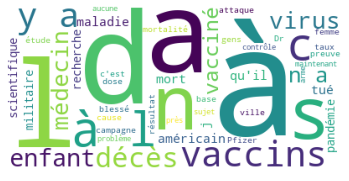

In [34]:
display_wc(df_texts[True][0],stop_words)